# More advanced plotting with Matplotlib

At this point you should know the basics of making plots with Matplotlib module.
Now we will expand on our basic plotting skills to learn how to create more advanced plots.
In this part, we will show how to visualize data using Matplotlib and create plots such as the one below.

![Subplot example in Matplotlib](img/subplots.png)

## The dataset

For this lesson we will use hourly weather data from Helsinki.

- The data file (`1924927457196dat.txt`) is in the `data` subdirectory.
- It contains observed hourly temperatures, windspeeds, etc. covering years 2012 and 2013. Observations were recorded at the Malmi airport weather station in Helsinki. It is derived from a data file of daily temperature measurments downloaded from the [US National Oceanographic and Atmospheric Administration’s National Centers for Environmental Information climate database](https://www7.ncdc.noaa.gov/CDO/cdopoemain.cmd?datasetabbv=DS3505&countryabbv=&georegionabbv=&resolution=40).
- There should be around 16.5 thousand rows in the data.

The first rows of the data looks like:

```
  USAF  WBAN YR--MODAHRMN DIR SPD GUS CLG SKC L M H  VSB MW MW MW MW AW AW AW AW W TEMP DEWP    SLP   ALT    STP MAX MIN PCP01 PCP06 PCP24 PCPXX SD
029750 99999 201201010050 280   3 ***  89 BKN * * *  7.0 ** ** ** ** ** ** ** ** *   28   25 ****** 29.74 ****** *** *** ***** ***** ***** ***** ** 
029750 99999 201201010150 310   3 ***  89 OVC * * *  7.0 ** ** ** ** ** ** ** ** *   27   25 ****** 29.77 ****** *** *** ***** ***** ***** ***** ** 
029750 99999 201201010250 280   1 *** *** *** * * *  6.2 ** ** ** ** ** ** ** ** *   25   21 ****** 29.77 ****** *** *** ***** ***** ***** ***** ** 
029750 99999 201201010350 200   1 *** *** *** * * *  6.2 ** ** ** ** ** ** ** ** *   21   21 ****** 29.80 ****** *** *** ***** ***** ***** ***** ** 
```

## Getting started

Let's start again by importing the pyplot submodule of Matplotlib.

In [1]:
import matplotlib.pyplot as plt

### NumPy

In [2]:
import numpy as np

### Loading the data

As always, let's first import Pandas.

In [3]:
import pandas as pd

We can now load our data using a similar approach to that used in the previous lessons.

In [4]:
fp = 'data/1924927457196dat.txt'
dataFrame = pd.read_csv(fp, sep='\s+', na_values=['*', '**', '***', '****', '*****', '******'])

As in the last section of this week's lesson, let's separate `dataFrame` into separate value arrays for the `YR--MODAHRMN`, `SPD`, and `TEMP` columns.

In [5]:
date = dataFrame['YR--MODAHRMN'].values
temp = dataFrame['TEMP'].values

## Preparing the data

A quick check of the `temp` data will reveal there are a handful of missing data values.
We can check for the existence of `nan` values, for example, by running the cell below.

In [6]:
print('Number of date nans: ', np.isnan(date).sum())
print('Number of temp nans: ', np.isnan(temp).sum())

Number of date nans:  0
Number of temp nans:  26


Ouch, 26 bad values to cut.
Since we're working with value arrays, the easiest way to drop the `nan` values from `temp` is save only the values that are not `nan`.
We can do this, for example, using the following.

In [7]:
temp_mask = ~np.isnan(temp)
temp = temp[temp_mask]

This command simply uses the NumPy `isnan()` function to find all `nan` values, then takes the logical opposite (not) of those values using the `~` character.

For those using Pandas, you could possibly use `dropna()` as an alternative to this approach, but only for the dataframe, not the value arrays.

Lastly, since we've cut `nan` values from `temp` we should do the same in `date`.

In [8]:
date = date[temp_mask]

### Converting temperatures to Celsius

Now that we have loaded our data, we can convert the values of temperature in Fahrenheit to Celsius, much like we have in earlier lessons.

In [9]:
temp_celsius = (temp - 32.0) / 1.8

We should now have a value array `temp_celsius` with all of the temperatures from the data file in Celsius.

## Using subplots

Let's continue working with the weather data and learn how to do subplots, i.e. Figures where you have multiple plots in different panels as was shown at the start of the lesson.

### Extracting seasonal temperatures

Let's first divide our data into different seasons: Winter (December-February), Spring (March-May), Summer (June-August), and Fall (Septempber-November).

In [10]:
winter_mask = (date >= 201212010000) & (date < 201303010000)
winter_dates = date[winter_mask]
winter_temps = temp_celsius[winter_mask]

spring_mask = (date >= 201303010000) & (date < 201306010000)
spring_dates = date[spring_mask]
spring_temps = temp_celsius[spring_mask]

summer_mask = (date >= 201306010000) & (date < 201309010000)
summer_dates = date[summer_mask]
summer_temps = temp_celsius[summer_mask]

fall_mask = (date >= 201309010000) & (date < 201401010000)
fall_dates = date[fall_mask]
fall_temps = temp_celsius[fall_mask]

Now we can plot our data to see how the different seasons look separately.

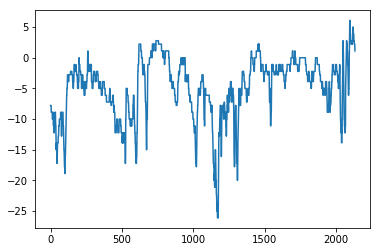

In [11]:
plt.plot(winter_temps)

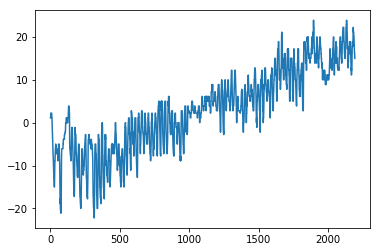

In [12]:
plt.plot(spring_temps)

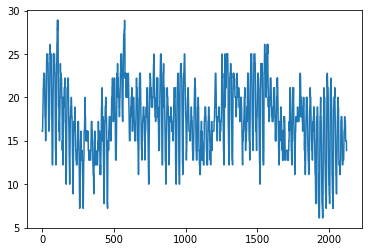

In [13]:
plt.plot(summer_temps)

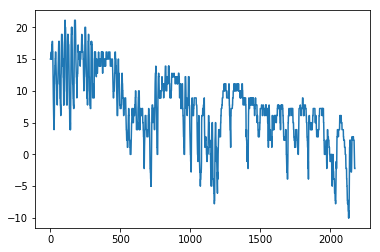

In [14]:
plt.plot(fall_temps)

OK, so from these plots we can already see that the temperatures in different seasons are quite different, which is rather obvious of course.
It is important to also notice that the scale of the *y*-axis changes in these different plots.
If we would like to compare different seasons to each other we need to make sure that the temperature scale is similar in the plots of the different seasons.

### Finding data bounds

Let's set our *y*-axis limits so that the upper limit is the maximum temperature + 5 degrees in our data (full year), and the lowest is the minimum temperature - 5 degrees.

In [15]:
min_temp = temp_celsius.min() - 5
max_temp = temp_celsius.max() + 5
print("Min:", min_temp, "Max:", max_temp)

Min: -33.8888888889 Max: 33.8888888889


OK, so now we can see that the minimum temperature in our data is approximately -29 degrees and the maximum is +29 degrees.
We can now use those values to standardize the y-axis scale of our plot.

### Creating our first set of subplots

Let's now continue and see how we can plot all these different plots into the same figure.
We can create a 2x2 panel for our visualization using matplotlib’s `subplots()` function where we specify how many rows and columns we want to have in our figure.
We can also specify the size of our figure with `figsize()` parameter that takes the `width` and `height` values (in inches) as input.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C69C3CF5F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002C69CAA3240>]], dtype=object)

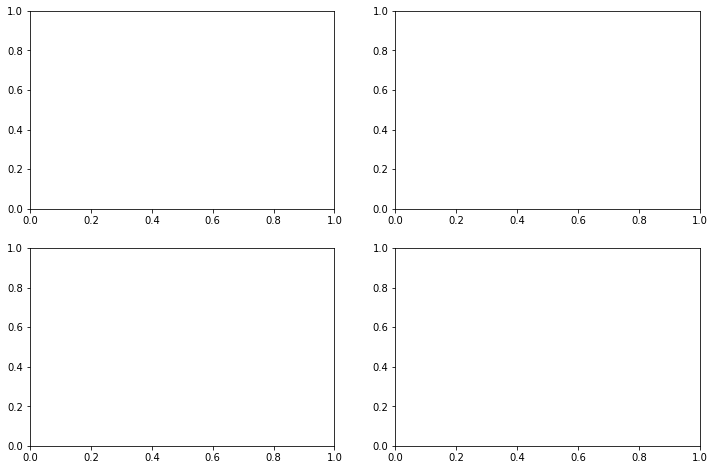

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8));
axes

We can see that as a result we have now a list containing two nested lists where the first one contains the axis for column 1 and 2 on **row 1** and the second list contains the axis for columns 1 and 2 for **row 2**.
We can parse these axes into own variables so it is easier to work with them.

In [17]:
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

Now we have four different axis variables for different panels in our figure.
Next we can use them to plot the seasonal data into them.
Let's first plot the seasons and give different colors for the lines, and specify the *y*-scale limits to be the same with all subplots.
With parameter `c` it is possible to specify the color of the line.
You can find an extensive list of possible colors and RGB-color codes from [this link](http://www.rapidtables.com/web/color/RGB_Color.htm).
With `lw` parameter you can specify the width of the line.

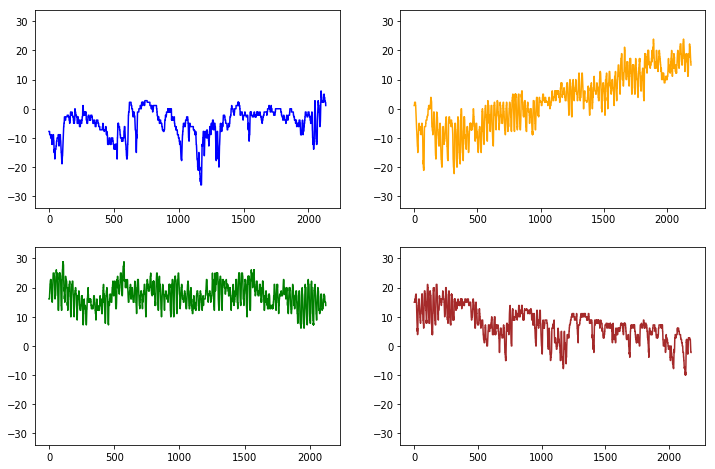

In [18]:
# Set plot line width
line_width = 1.5

# Plot data
ax11.plot(winter_temps, c='blue', lw=line_width)
ax12.plot(spring_temps, c='orange', lw=line_width)
ax21.plot(summer_temps, c='green', lw=line_width)
ax22.plot(fall_temps, c='brown', lw=line_width)

# Set y-axis limits
ax11.set_ylim(min_temp, max_temp)
ax12.set_ylim(min_temp, max_temp)
ax21.set_ylim(min_temp, max_temp)
ax22.set_ylim(min_temp, max_temp)

# Display figure
fig

Great, now we have all the plots in same figure!
However, we can see that there are some problems with our *x*-axis as we haven't linked that axis to the dates of the observations.
We can change that with a bit of `datetime` module magic.

### Converting our date string to dates for Matplotlib plotting

We can start by importing the `datetime` submodule from `datetime`.

In [19]:
from datetime import datetime

With `datetime` imported, we can now create a function that will convert all of our dates in `date` to a special representation of that date data that Matplotlib understands as a date for plotting.
Before we can define and use our function, however, we'll need our dates as a character string array.

In [20]:
winter_str = winter_dates.astype(str)
spring_str = spring_dates.astype(str)
summer_str = summer_dates.astype(str)
fall_str = fall_dates.astype(str)

OK, so now we have our dates as strings in `<season>_str`.
Now we can create our date conversion function.

In [21]:
def convert(date):
    return datetime.strptime(date, '%Y%m%d%H%M')

`datetime.strptime()` is a special function in `datetime` used to convert strings to `datetime` objects.
In our case, we will convert each value from the format `YYYYMMDDhhmm` to `datetime`, where `YYYY` is the year, `MM` is the month, `DD` is the day, `hh` is the hour of the day, and `mm` is the minute in the hour.

Let's put our function to work.

In [22]:
winter_dt = [convert(date) for date in winter_str]
winter_dt = np.array(winter_dt)

spring_dt = [convert(date) for date in spring_str]
spring_dt = np.array(spring_dt)

summer_dt = [convert(date) for date in summer_str]
summer_dt = np.array(summer_dt)

fall_dt = [convert(date) for date in fall_str]
fall_dt = np.array(fall_dt)

What has happened here is that we have created a new list of `datetime` values using list comprehension, then converted the output to NumPy arrays for each season.
If you don't understand everything at this point, don't worry.
The important thing is we're ready to plot again!

We can set things up the way we did previously.

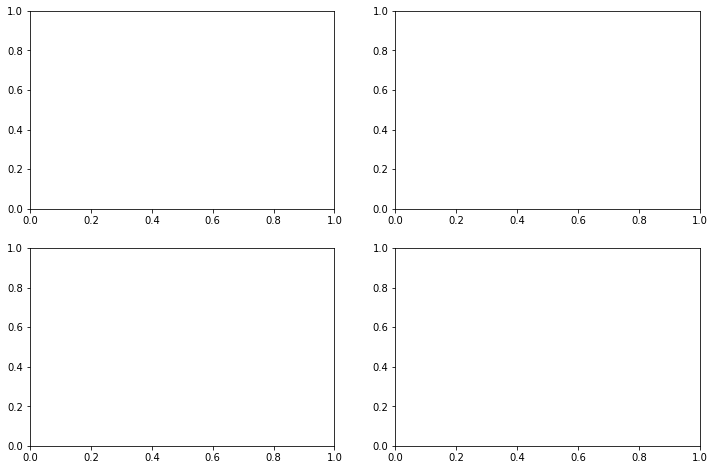

In [23]:
# Create the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# Rename the axes for ease of use
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

Now, we'll add our seasonal temperatures to the plot commands for each time period.

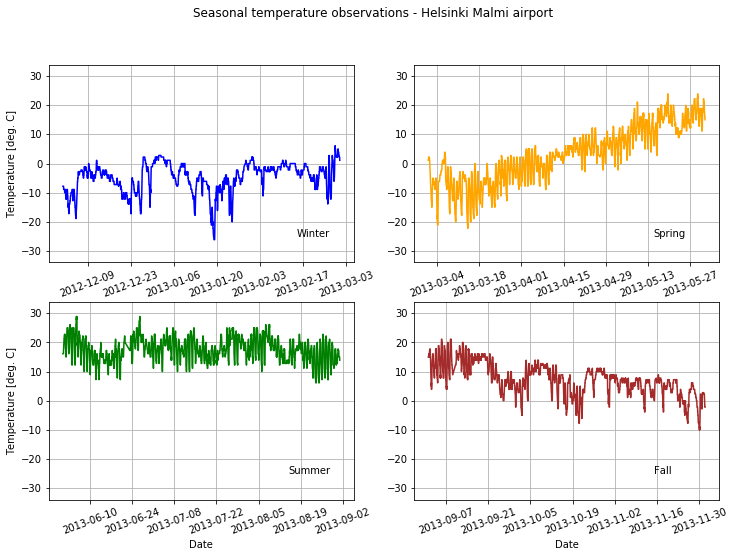

In [24]:
# Set the plotted line width
line_width = 1.5

# Plot data
ax11.plot(winter_dt, winter_temps, c='blue', lw=line_width)
ax12.plot(spring_dt, spring_temps, c='orange', lw=line_width)
ax21.plot(summer_dt, summer_temps, c='green', lw=line_width)
ax22.plot(fall_dt, fall_temps, c='brown', lw=line_width)

# Set y-axis limits
ax11.set_ylim(min_temp, max_temp)
ax12.set_ylim(min_temp, max_temp)
ax21.set_ylim(min_temp, max_temp)
ax22.set_ylim(min_temp, max_temp)

# Turn plot grids on
ax11.grid()
ax12.grid()
ax21.grid()
ax22.grid()

# Figure title
fig.suptitle('Seasonal temperature observations - Helsinki Malmi airport')

# Rotate the x-axis labels so they don't overlap
plt.setp(ax11.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax12.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax21.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax22.xaxis.get_majorticklabels(), rotation=20)

# Axis labels
ax21.set_xlabel('Date')
ax22.set_xlabel('Date')
ax11.set_ylabel('Temperature [deg. C]')
ax21.set_ylabel('Temperature [deg. C]')

# Season label text
ax11.text(datetime(2013, 2, 15), -25, 'Winter')
ax12.text(datetime(2013, 5, 15), -25, 'Spring')
ax21.text(datetime(2013, 8, 15), -25, 'Summer')
ax22.text(datetime(2013, 11, 15), -25, 'Fall')

fig

Not bad.